# Investigating Fandango Film Ratings
---

There was an [article](https://fivethirtyeight.com/features/fandango-movies-ratings/) in 2015 written by Walt Hickey pointing a significant discrepency between the actual rating and the number of stars displayed to users. The actual rating was almost always rounded up, including some completely bizarre rounding of 4 and displaying 5 stars. 

The main idea of this project is to analyze Fandango film ratings. The goal is to determine the reliability of the ratings presented on the [Fandango](https://www.fandango.com/) website and investigate whether there has been any change in Fandango's rating system after Hickey's article. 

We will use the data from the Hickey's analysis, which is publicly avaiable on [GitHub](https://github.com/fivethirtyeight/data/tree/master/fandango) and Dataquest's team collected film [ratings from 2016 and 2017](https://github.com/mircealex/Movie_ratings_2016_17).

## Dataset Overview

We will begin with reading in the dataset and we would like to perform an initial data exploration.

In [1]:
# Importing libraries
import pandas as pd
import numpy as np

# Reading in data from Hickey's analysis
ratings_Hickey = pd.read_csv('projects_dq\\Fandango\\fandango_score_comparison.csv', encoding='ISO-8859-1')
# Reading in Dataquest data
ratings_dq = pd.read_csv('projects_dq\\Fandango\\movie_ratings_16_17.csv', encoding='ISO-8859-1')

In [2]:
# Reviewing the data in Hickey's dataset
ratings_Hickey.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [3]:
# Finding out the total number of rows in Hickey's dataset
print('Number of all rows in the dataset:', ratings_Hickey.shape[0])

Number of all rows in the dataset: 146


There are 22 columns and 146 rows in dataset used in Hickey's analysis. The dataset contains ratings from Fandango and other websites like RT (Rotten Tomatoes), Metacritic, IMDB.

We will isolate the columns which represent information about Fandango's ratings in separate variables and make copies to avoid [SettingWithCopyWarning](https://www.dataquest.io/blog/settingwithcopywarning/).

In [4]:
# Selecting Fandango's ratings columns
fandango_Hickey = ratings_Hickey[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']].copy()

Right now, with fewer columns, it will be easier to analyze Fandango ratings. Let's review the data collected by Dataquest team.

In [5]:
# Reviewing the data from later period
ratings_dq.head()

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


In [6]:
# Checking the total number of rows and columns 
ratings_dq.shape

(214, 15)

There are 15 columns and 214 rows used in Dataquest's team dataset. This dataset, similarly to Hickey's, contains ratings from Fandango and other websites like RT (Rotten Tomatoes), Metacritic, IMDB. As before, we will select fewer columns.

In [7]:
# Selecting Fandango's ratings columns
fandango_dq = ratings_dq[['movie', 'year', 'fandango']].copy()

## Statistic Approach

Our main goal is to research whether there has been any change in Fandango's rating system after Hickey's analysis. The population for our analysis encompasses all film ratings stored on Fandango's website.

The Fandango data from Hickey's analysis was pulled in August 2015. The films included are only those that scored at least 30 fan reviews on Fandango. Additionally, we research the data collected in later period in order to find out whether the parameters of the population changed after Hickey's analysis. The later period data is a dataset collected by Dataquest team from films, with significant number of votes, realeased in 2016 and 2017.

Before we try to describe the population we will check whether the samples used in the project are representative, becuase we would like to avoid large sampling error and incorrect conclusions. Looking at sample criteria in both datasets, we can notice that films do not have same chance to be chosen. Some films are not selected at all if they do not meet the criteria. Another thing is that the films are from various periods of time. Comparing the data from different time periods may lead to incorrect assumptions in this case. Therefore, the samples might not be representative of the entire population. 


## The Goal Modification
---

Using the data we have, we cannot answer the question regarding change in Fandango's rating system after Hickey's analysis. However, it is still possible to investigate the difference in Fandango's popular film ratings released in period 2015-2017. 

---

## Defining Populations 

Based on our new goal, the populations are as follows:
- all Fandango's ratings for popular films released in 2015,
- all Fandango's ratings for popular films released in 2016,
- all Fandango's ratings for popular films released in 2017.

In our analysis `popular` means that the film received at least 30 reviews from fans on Fandango's website.  

## Isolating the Samples

The data from the Hickey's analysis contains only films with at least 30 reviews - according to the article. Let's check if it is true.

In [8]:
# Filtering the data
sum(fandango_Hickey['Fandango_votes'] < 30)

0

There are no films in Hickey's analysis, which have less than 30 reviews.

Datasets with film ratings from 2016 and 2017 do not represent the number of fan reviews. In this part of the project we will use random sampling to determine whether it is representative. First of all, we will sample radomly 10 films. Secondly, we will check whether the number of ratings is above 30 on [Fandango's website](https://www.fandango.com/).

In [9]:
# Performing a random sampling
fandango_dq.sample(10, random_state = 1)

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


Dataquest Team compared the above ratings in April 2018 and found the following results:

|Movie||Fan ratings|
|----||----|
|Mechanic: Resurrection||2247|
|Warcraft||7271|
|Max Steel||493|
|Me Before You||5263|
|Fantastic Beasts and Where to Find Them||13400|
|Cell||17|
|Grnius||127|
|Sully||11877|
|A Hologram for the King||500|
|Captitan America: Civil War||35057|



Just one film does not meet the requirements of popularity. Therefore we can continue our analysis. 

### Films released in 2015, 2016 and 2017

Finally, we will check if the films in the datasets were all released in years we want to research.

In [10]:
# Checking release years in Hickey's dataset
fandango_Hickey['FILM'].str[-5:-1].value_counts()

2015    129
2014     17
Name: FILM, dtype: int64

In Hickey's dataset there are 129 films from 2015 and 17 from 2014. We are only interested in those from 2015 so the other will be skipped.

In [11]:
# Isolating the films from 2015
fandango_Hickey['Year'] = fandango_Hickey['FILM'].str[-5:-1]
fandango_2015 = fandango_Hickey[fandango_Hickey['Year'] == '2015'].copy()
fandango_2015['Year'].value_counts()

2015    129
Name: Year, dtype: int64

In [12]:
# Checking release years in the second dataset
fandango_dq['year'].value_counts()

2016    191
2017     23
Name: year, dtype: int64

There are only 23 films from 2017 so we will skip them and keep only the ones from 2016.

In [13]:
# Isolating the films from 2016
fandango_2016 = fandango_dq[fandango_dq['year'] == 2016].copy()
fandango_2016['year'].value_counts()

2016    191
Name: year, dtype: int64

## Distribution Shapes

Now we can start analyzing the two samples we isolated before. We would like to investigate whether there is any difference between Fandango's ratings for popular films in years 2015-2016. We will begin with a comparison based on distribution shapes.

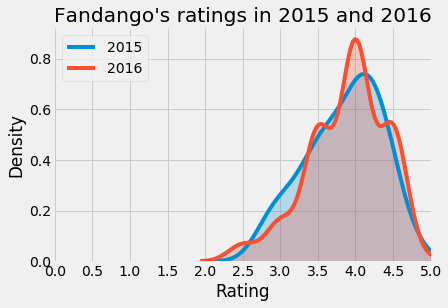

In [14]:
# Importing the necessary libraries
from numpy import arange
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Customizing the graph
plt.style.use('fivethirtyeight')

# Generating the kernel density plots
sns.kdeplot(fandango_2015["Fandango_Ratingvalue"], label = '2015', shade=True)
sns.kdeplot(fandango_2016["fandango"], label = '2016', shade=True)
plt.title('Fandango\'s ratings in 2015 and 2016')
plt.xlabel("Rating")
plt.ylabel('Density')
plt.xlim(0,5)
plt.xticks(arange(0,5.1,.5))
sns.despine(left=True, bottom=True)

The shape of distribution indicating ratings from 2015 has one peak at about 4.2 points. The distribution is negatively (left) skewed, which means that more values are concentrated on the right side of the graph while left side is longer. 

Although in 2016 the figure is also left skewed, the shape looks clearly diffrent. It has three peaks:
- left peak (3.5),
- middle peak (4.0),
- right peak (4.5).

The distributions prove that there is a change in Fandango ratings in 2016 in comparison to 2015. We can see that in 2016 less films received raitings below 3.5 and between 4.2-4.5. However, there were significantly more films which scored about 4 points. Overall, we can say that films in 2016 were assessed slightly lower than those in 2015.

## Frequency Tables

We will try to compare the frequency distribution tables of the two distributions. First of all, we will compare the two tables using relative frequencies (percentages).

In [15]:
# Generating a frequency table for Hickey's dataset
frequency_2015 = fandango_2015['Fandango_Ratingvalue'].value_counts(normalize = True)
round(frequency_2015*100, 2)

4.1    10.08
3.9     9.30
4.2     8.53
4.3     6.98
4.5     6.98
3.6     6.20
3.7     6.20
4.4     5.43
3.4     5.43
4.0     5.43
3.5     4.65
3.2     3.10
2.9     3.10
3.3     3.10
3.8     3.10
3.0     3.10
3.1     2.33
4.8     2.33
2.8     1.55
4.6     1.55
2.7     1.55
Name: Fandango_Ratingvalue, dtype: float64

We can observe that the most common rating is 4.1 (over 10% of films). However, it is difficult to find patterns so we will use ordinal scale rather than ratio one.

|Condition||Label|
|----||----|
|number of films rated < 3.0||very low rating|
|3.0 <= rating < 4.0||low rating|
|4.0 <= rating < 4.5||good rating|
|rating >= 4.5||perfect rating|

In [16]:
# Writing a function for ordinal ratings
def make_ratings_ordinal(row):
    if row['Fandango_Ratingvalue'] < 3.0:
        return 'very low rating'
    if (3.0 <= row['Fandango_Ratingvalue'] < 4.0):
        return 'low rating'
    if (4.0 <= row['Fandango_Ratingvalue'] < 4.5):
        return 'good rating'
    else:
        return 'perfect rating'

# Applying the function
fandango_2015['Rating_ordinal_scale'] = fandango_2015.apply(make_ratings_ordinal, axis=1)
print(fandango_2015['Rating_ordinal_scale'].value_counts())

low rating         60
good rating        47
perfect rating     14
very low rating     8
Name: Rating_ordinal_scale, dtype: int64


In dataset from 2015 the most common rating is a low rating - 60 films, which accounts for almost half ratings (as mentioned earlier in the project there are in total 129 films). Good rating is also very common (47 films). Let's see how outcomes are in 2016.

In [17]:
# Writing a function for ordinal ratings
def make_ratings_ordinal(row):
    if row['fandango'] < 3.0:
        return 'very low rating'
    if (3.0 <= row['fandango'] < 4.0):
        return 'low rating'
    if (4.0 <= row['fandango'] < 4.5):
        return 'good rating'
    else:
        return 'perfect rating'

# Applying the function
fandango_2016['fandango_ordinal_scale'] = fandango_2016.apply(make_ratings_ordinal, axis=1)
print(fandango_2016['fandango_ordinal_scale'].value_counts())

good rating        77
low rating         60
perfect rating     48
very low rating     6
Name: fandango_ordinal_scale, dtype: int64


In 2016 the most common rating was a good rating - 77 films, which out of 191 total, is still a high number. Many films were also assessed low (60) and perfect (48).

Our findings regarding distribution shapes align with the above findings. Back then we noticed that in 2016 in comparison to 2015 the number of good ratings was higher (middle peak). However, the number of low ratings in 2015 was proportionaly larger in 2015 than 2016. 

## Determining the Direction of the Change

The findings we already made are usueful, however we would like to investigate more regarding the direction of the change. From frequency tables and kernel density plots it was not clear enough to determine the direction. Summary statistics shoul,d be a helpful tool here.

In [21]:
# Computing summary statistics for films from 2015
print('Rating Mean 2015')
mean_2015 = round(fandango_2015['Fandango_Ratingvalue'].mean(),2)
print(mean_2015)                  

print('Rating Median 2015')
median_2015 = round(fandango_2015['Fandango_Ratingvalue'].median(),2)
print(median_2015)

print('Rating mode 2015')
mode_2015 = round(fandango_2015['Fandango_Ratingvalue'].mode(),2)
print(mode_2015)

Rating Mean 2015
3.85
Rating Median 2015
3.9
Rating mode 2015
0    4.1
dtype: float64


In [19]:
# Computing summary statistics for films from 2016
print('Rating Mean 2016')
mean_2016 = round(fandango_2016['fandango'].mean(),2)
print(mean_2016)

print('Rating Median 2016')
median_2016 = round(fandango_2016['fandango'].median(),2)
print(median_2016)

print('Rating Mode 2016')
mode_2016 = round(fandango_2016['fandango'].mode(),2)
print(mode_2016)

Rating Mean 2016
3.89
Rating Median 2016
4.0
Rating Mode 2016
0    4.0
dtype: float64


Based on summary statistics we can make the following conclusions:
- in 2015 average rating value was 3.85 while in 2016 it was 3.89. The result indicates that in general the rating in 2016 was slightly higher in comparison to 2015,
- median in 2015 was 3.9 and in 2016 4.0. It indicates that central tendency was a little larger in 2016.
- looking at mode, rating that appears most often in 2015 was 4.1 and in 2016 4.0.

Overall, we can say that the difference in summary statistics of both distributions is slight.

## Fandango against the background of others

Before we come to conclusions, we would like to compare avarage Fandango ratings in years 2015-2016 with the outcomes of other film rating websites: Metacritic, Rotten Tomatoes, IMDB.

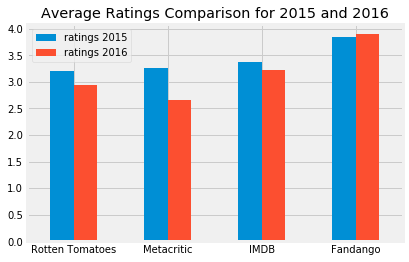

In [69]:
# Selecting necessary columns from Hickey's dataset
cols_2015 = ['FILM', 'RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue']
reviews_2015 = ratings_Hickey[cols_2015]

# Selecting necessary columns for 2016 ratings
cols_2016 = ['movie', 'n_audience', 'n_imdb', 'fandango', 'n_metascore']
reviews_2016 = ratings_dq[cols_2016]

# Calculating average ratings in 2015
avg_RT_15 = reviews_2015['RT_user_norm'].sum() / len(reviews_2015['RT_user_norm'])
avg_Metacritic_15 = reviews_2015['Metacritic_user_nom'].sum() / len(reviews_2015['Metacritic_user_nom'])
avg_IMDB_15 = reviews_2015['IMDB_norm'].sum() / len(reviews_2015['IMDB_norm'])
avg_fandango_15 = reviews_2015['Fandango_Ratingvalue'].sum() / len(reviews_2015['Fandango_Ratingvalue'])

# Calculating average ratings in 2016
avg_RT_16 = reviews_2016['n_audience'].sum() / len(reviews_2016['n_audience'])
avg_Metacritic_16 = reviews_2016['n_metascore'].sum() / len(reviews_2016['n_metascore'])
avg_IMDB_16 = reviews_2016['n_imdb'].sum() / len(reviews_2016['n_imdb'])
avg_fandango_16 = reviews_2016['fandango'].sum() / len(reviews_2016['fandango']) 

# Plotting a bar plot for rating comparision
ratings_2015 = [avg_RT_15, avg_Metacritic_15, avg_IMDB_15, avg_fandango_15]
ratings_2016 = [avg_RT_16, avg_Metacritic_16, avg_IMDB_16, avg_fandango_16]
index = ['Rotten Tomatoes', 'Metacritic', 'IMDB', 'Fandango']
df= pd.DataFrame({'ratings 2015': ratings_2015, 'ratings 2016': ratings_2016}, index=index)
ax = df.plot.bar(rot=0, title ='Average Ratings Comparison for 2015 and 2016')

Looking at above graph we can notice immediately that Fandango average ratings in both 2015 and 2016 were the highest. What is more, in 2016 the Fandango average rating in comparison to 2015 was slightly larger. At the same time, we can see an opposed tendency in case of Rotten Tomatoes, Metacritic and IMDB, where the average ratings in 2016 were lower in each case in comparison to 2015. 

# Conclusions
---

Based on the data we worked with in this project we could not provide an answer to question whether there has been any change in Fandango's rating system after Hickey's article. We found out that due to the fact that films in Hickey's analysis were chosen according to predefined criteria, the sample is not representative. We redefined our goal and decided to investigate a difference in Fandango's popular film ratings released in period 2015-2016.

We made the following findings:
- there is a distribution change in Fandango ratings in 2016 in comparison to 2015,
- the difference in summary statistics of both distributions is slight,
- Fandango average ratings in both 2015 and 2016 were the highest (in comparison to Rotten Tomatoes, Metacritic and IMDB),
- in 2016 the Fandango average rating in comparison to 2015 was slightly larger.